In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns = pd.read_excel('/home/kyohei/NEDO_anke_data/NEDO_H24.xlsx').columns
data = pd.read_excel('/home/kyohei/NEDO_anke_data/NEDO_H24.xlsx',skiprows=6,skip_footer=12)
data.columns = columns

### マネジメントに係る項目

#### Q4
- 目的の明確さ
- 目的の共有
- 目標の明確さ
- 目標の共有
- 役割分担の明確さ
- 役割分担の共有

#### Q11
- 目標値の達成度

#### Q30
- ネットワークに寄与した要因

#### Q33
- 研究開発の推進や方向付け
- 他機関との調整
- 事業化の推進や方向付け

#### Q34
- NEDOプロジェクトリーダーとの協議
- NEDOの担当者との協議

#### Q44
- プロジェクトに対する満足度はどれくらいでしたか

#### Q46
- 採択審査委員は適任者で構成されていましたか
- 採択審査時のコメント内容

#### Q47
- プロジェクトの推進に関して有効な低減や意見はありましたか

#### Q48
- 中間評価の満足度
- 中間評価での指摘事項が及ぼすその後のプロジェクトの影響

#### Q49
- 事後評価の満足度→事後評価を受けていない事業者が結構いるので、使わない。

#### Q50
- NEDOの担当のマネジメントに対する満足度はどれくらいでしたか

#### Q51
- やって欲しかったこと←何個あるか

In [3]:
data.ix[:,data.columns.str.contains(u'Q4_')].head()

,Q4_目的明確,Q4_目的共有,Q4_目標明確,Q4_目標共有,Q4_役割分担,Q4_役割共有
0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,1.0,2.0,1.0,2.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
Q4 = data.ix[:,data.columns.str.contains(u'Q4_')]
columns_Q4 = Q4.columns
data_temp = []
for i,value in enumerate(columns_Q4):
    temp = pd.get_dummies(Q4[value],prefix=value)
    data_temp.append(temp)
Q4_open = pd.concat(data_temp,axis=1)

In [5]:
Q4_open.head(3)

,Q4_目的明確_1.0,Q4_目的明確_2.0,Q4_目的共有_1.0,Q4_目的共有_2.0,Q4_目標明確_1.0,Q4_目標明確_2.0,Q4_目標共有_1.0,Q4_目標共有_2.0,Q4_役割分担_1.0,Q4_役割分担_2.0,Q4_役割分担_3.0,Q4_役割共有_1.0,Q4_役割共有_2.0,Q4_役割共有_3.0
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [6]:
Q11_open = pd.get_dummies(data[u'Q11_目標'],prefix=u'Q11_目標')

In [7]:
Q11_open.head(3)

,Q11_目標_1.0,Q11_目標_2.0,Q11_目標_3.0,Q11_目標_4.0,Q11_目標_6.0
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0


In [8]:
Q30_open = data[[u'Q30_ネットワーク要因_日常的なNEDOとの交流',u'Q30_ネットワーク要因_NEDO主催の委員会など']].fillna(0)

In [9]:
temp = data[[u'Q33_推進',u'Q33_調整',u'Q33_事業化']]

In [10]:
temp_data = []
for i,value in enumerate(temp.columns):
    data_ = pd.get_dummies(data[value],prefix=value)
    temp_data.append(data_)
Q33_open = pd.concat(temp_data,axis=1)

In [11]:
Q33_open = Q33_open.ix[:,(Q33_open.columns.str.contains(u'_1.0'))]

In [12]:
Q33_open.head(3)

,Q33_推進_1.0,Q33_調整_1.0,Q33_事業化_1.0
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0


In [13]:
Q34_open = pd.get_dummies(data[u'Q34_PL'],prefix=u'Q34_PL')

In [14]:
Q34_open.head(3)

,Q34_PL_1.0,Q34_PL_2.0,Q34_PL_3.0,Q34_PL_4.0,Q34_PL_5.0,Q34_PL_6.0
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
Q44_open = pd.get_dummies(data[u'Q44_満足_評価'],prefix=u'Q44_満足_評価')

In [16]:
Q44_open.head(3)

,Q44_満足_評価_1.0,Q44_満足_評価_2.0,Q44_満足_評価_3.0,Q44_満足_評価_4.0,Q44_満足_評価_5.0
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0


In [17]:
temp = data.ix[:,data.columns.str.contains(u'Q46_')]

In [18]:
temp_data = []
for i,value in enumerate(temp.columns):
    temp_data_ = pd.get_dummies(temp[value],prefix=value)
    temp_data.append(temp_data_)
Q46_open = pd.concat(temp_data,axis=1)

In [19]:
Q46_open.head(3)

,Q46_構成_1.0,Q46_構成_2.0,Q46_構成_3.0,Q46_構成_5.0,Q46_内容_1.0,Q46_内容_2.0,Q46_内容_3.0,Q46_内容_4.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
Q47_open = pd.get_dummies(data[u'Q47_提言'],prefix=u'Q47_提言')

In [21]:
Q47_open.head(3)

,Q47_提言_1.0,Q47_提言_2.0,Q47_提言_3.0,Q47_提言_4.0
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0


In [22]:
data.ix[:,data.columns.str.contains(u'Q48_')].head(3)

,Q48_満足_評価,Q48_理由,Q48_影響_目標達成度の向上,Q48_影響_予期せぬ成果が得られた,Q48_影響_競争優位性の強化,Q48_影響_殆どなかった,Q48_影響_その他,Q48_影響_記述欄,Q48_指摘_技術の進展予測,Q48_指摘_計画の変更・追加,Q48_指摘_技術・コスト課題克服アイディア,Q48_指摘_メカニズムの解明のアイディア・ヒント,Q48_指摘_周辺技術動向の情報,Q48_指摘_中止の勧告,Q48_指摘_その他,Q48_指摘_記述欄
0,1.0,中間評価のタイミングは適切で、委員からも適切なコメントをいただいた。,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,1.0,中間評価の目標値は達成したので、良いコメントがもらえ満足。,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,2.0,困難な状況を適性に評価いただいた,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [23]:
Q48_open_part = pd.get_dummies(data[u'Q48_満足_評価'],prefix=u'Q48_満足_評価')

In [24]:
Q48_open_part.sum()

Q48_満足_評価_1.0    41.0
Q48_満足_評価_2.0    71.0
Q48_満足_評価_3.0    25.0
Q48_満足_評価_4.0     5.0
Q48_満足_評価_5.0     3.0
Q48_満足_評価_6.0    13.0
dtype: float64

In [25]:
Q48_open_part2  = data.ix[:,data.columns.str.contains(u'Q48_影響')].ix[:,:4].fillna(0)

In [26]:
Q48_open = pd.concat([Q48_open_part,Q48_open_part2],axis=1)

In [27]:
Q48_open.head(3)

,Q48_満足_評価_1.0,Q48_満足_評価_2.0,Q48_満足_評価_3.0,Q48_満足_評価_4.0,Q48_満足_評価_5.0,Q48_満足_評価_6.0,Q48_影響_目標達成度の向上,Q48_影響_予期せぬ成果が得られた,Q48_影響_競争優位性の強化,Q48_影響_殆どなかった
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
data.ix[:,data.columns.str.contains(u'Q49_')]

,Q49_満足_評価,Q49_理由,Q49_指摘_製品化アイディア,Q49_指摘_技術転用等の波及効果,Q49_指摘_技術・コスト課題克服のアイディア,Q49_指摘_生産工程上の課題および解決法,Q49_指摘_周辺技術動向の情報,Q49_指摘_その他,Q49_指摘_記述欄
0,NaN,事後評価委員会は9月21日予定で、今後実施予定のため未実施。,NaN,NaN,NaN,NaN,NaN,1.0,事後評価委員会は9月21日予定で、今後実施予定のため未実施。
1,1.0,事後評価は未だ受けていませんが、目標達成したため満足しています。,1.0,1.0,NaN,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,まだ、事後評価は実施していません（2012年9月実施予定）,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,委員選定、評価のタイミング、評価資料の準備のいずれについても適切だったから。,NaN,NaN,1.0,NaN,1.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,まだ事後評価を実施していない,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.0,行ってきた事業に対して、高評価をいただいた。,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8,2.0,行ってきた事業に対して、高評価をいただいた。,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
Q49_open = data[u'Q49_満足_評価'].fillna(0)

In [30]:
Q49_open.head(3)

0    0.0
1    1.0
2    0.0
Name: Q49_満足_評価, dtype: float64

In [31]:
Q50_open = pd.get_dummies(data[u'Q50_評価'],prefix=u'Q50_評価')

In [32]:
Q50_open.head(3)

,Q50_評価_1.0,Q50_評価_2.0,Q50_評価_3.0,Q50_評価_4.0,Q50_評価_5.0
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0


In [33]:
Q51_open = data.ix[:,data.columns.str.contains(u'Q51_欲しかったこと')].ix[:,:-2].fillna(0)

In [34]:
Q51_open.head(3)

,Q51_欲しかったこと_実施計画書の内容精査（契約手続きに係る対応）,Q51_欲しかったこと_予算要求または予算配分に係る対応,Q51_欲しかったこと_中間・事後評価に係る対応,Q51_欲しかったこと_検査に係る対応,Q51_欲しかったこと_資産処分に係る対応,Q51_欲しかったこと_成果報告書の内容精査,Q51_欲しかったこと_各種提出書類に係る対応,Q51_欲しかったこと_他機関との利害調整,Q51_欲しかったこと_法規制に係る協議,Q51_欲しかったこと_事業化シナリオの方向性検討,Q51_欲しかったこと_研究開発の方向性検討,Q51_欲しかったこと_知的財産等の取り扱いに係る検討,Q51_欲しかったこと_戦略的な標準化取得に向けた検討,Q51_欲しかったこと_技術的なアドバイス（データ解析・解釈）,Q51_欲しかったこと_市場に関するアドバイス,Q51_欲しかったこと_委員会準備（データ・資料整理 プレゼン方法等）,Q51_欲しかったこと_宣伝・広報
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
who

Q11_open	 Q30_open	 Q33_open	 Q34_open	 Q4	 Q44_open	 Q46_open	 Q47_open	 Q48_open	 
Q48_open_part	 Q48_open_part2	 Q49_open	 Q4_open	 Q50_open	 Q51_open	 columns	 columns_Q4	 data	 
data_	 data_temp	 i	 np	 pd	 plt	 sns	 temp	 temp_data	 
temp_data_	 value	 


# 成功データの結合

In [36]:
Q4_suc = Q4_open.ix[:,Q4_open.columns.str.contains(u'_1.0')]
Q11_suc = Q11_open.ix[:,0]
Q30_suc = Q30_open
Q33_suc = Q33_open
Q34_suc = Q34_open.ix[:,0]
Q44_suc = Q44_open.ix[:,0]
Q46_suc = Q46_open.ix[:,Q46_open.columns.str.contains(u'_1.0')]
Q47_suc = Q47_open.ix[:,:2]
Q48_suc = Q48_open.ix[:,[0,6,7,8]]
Q49_suc = Q49_open
Q50_suc = Q50_open.ix[:,0]

In [37]:
data_list = [Q4_suc,Q30_suc,Q33_suc,Q34_suc,Q44_suc,Q46_suc,Q47_suc,Q48_suc,Q50_suc]

In [38]:
data_merge = pd.concat(data_list,axis=1)

In [39]:
data_merge.shape

(175, 22)

In [40]:
data_merge.sum()

Q4_目的明確_1.0                  150.0
Q4_目的共有_1.0                  144.0
Q4_目標明確_1.0                  133.0
Q4_目標共有_1.0                  129.0
Q4_役割分担_1.0                  138.0
Q4_役割共有_1.0                  140.0
Q30_ネットワーク要因_日常的なNEDOとの交流     17.0
Q30_ネットワーク要因_NEDO主催の委員会など     50.0
Q33_推進_1.0                    62.0
Q33_調整_1.0                    57.0
Q33_事業化_1.0                   26.0
Q34_PL_1.0                     3.0
Q44_満足_評価_1.0                 43.0
Q46_構成_1.0                    31.0
Q46_内容_1.0                    89.0
Q47_提言_1.0                    47.0
Q47_提言_2.0                    74.0
Q48_満足_評価_1.0                 41.0
Q48_影響_目標達成度の向上               78.0
Q48_影響_予期せぬ成果が得られた             5.0
Q48_影響_競争優位性の強化               14.0
Q50_評価_1.0                    46.0
dtype: float64

In [41]:
sum_data = data_merge.sum(axis=1)

In [42]:
sum_data.describe()

count    175.000000
mean       8.668571
std        3.353483
min        0.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       16.000000
dtype: float64

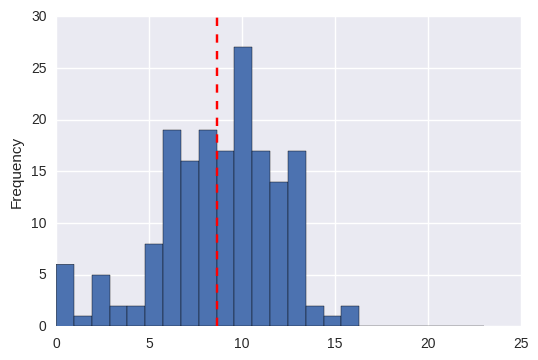

In [43]:
sum_data.plot(kind='hist',range=[0,23],bins=24)
plt.axvline(sum_data.mean(),c='r',linestyle='--')

平均が9.5で標準偏差が3.5なので13以上のデータをうまく言ったデータとして活用する。34ケース

In [44]:
success_data = (sum_data>=12).astype(int)

In [45]:
test_data = pd.concat([success_data,Q11_open],axis=1)

In [46]:
#たくさんうまくいくといい感じだね
test_data.groupby(0).mean()

,Q11_目標_1.0,Q11_目標_2.0,Q11_目標_3.0,Q11_目標_4.0,Q11_目標_6.0
0,,,,,
0,0.424460,0.374101,0.129496,0.028777,0.028777
1,0.611111,0.333333,0.000000,0.027778,0.027778


In [47]:
test_suc = test_data[test_data[0]==1]

In [48]:
#目標値の達成度低い
test_suc[(test_suc[u'Q11_目標_3.0']==1) | (test_suc[u'Q11_目標_4.0']==1)].index

Int64Index([82], dtype='int64')

In [49]:
#中止中断
data.loc[test_suc.index][u'Q13_継続・非継続']==2

0      False
2      False
7       True
8       True
15      True
21     False
25     False
26     False
31     False
32     False
36     False
39     False
43     False
46     False
50     False
56     False
59     False
71     False
82      True
83     False
84     False
87     False
90     False
92     False
93     False
101    False
108    False
111    False
113    False
119    False
121    False
145    False
146    False
158    False
160    False
174    False
Name: Q13_継続・非継続, dtype: bool

In [50]:
Q4_fal = Q4_open.ix[:,Q4_open.columns.str.contains(u'_3.0')]
Q30_fal = (Q30_open==0).astype(int)
Q33_fal = (Q33_open==0).astype(int)
Q34_fal = Q34_open.ix[:,5]
Q44_fal = Q44_open.ix[:,4]
Q46_fal = Q46_open[[u'Q46_構成_3.0',u'Q46_内容_2.0']]
Q47_fal = Q47_open.ix[:,2:]
Q48_fal = Q48_open.ix[:,[4,9]]
Q50_fal = Q50_open.ix[:,4]

In [51]:
data_list = [Q4_fal,Q30_fal,Q33_fal,Q34_fal,Q44_fal,Q46_fal,Q47_fal,Q48_fal,Q50_fal]

In [52]:
merge_data_fal = pd.concat(data_list,axis=1)

In [53]:
merge_data_fal.sum()

Q4_役割分担_3.0                    1.0
Q4_役割共有_3.0                    1.0
Q30_ネットワーク要因_日常的なNEDOとの交流    158.0
Q30_ネットワーク要因_NEDO主催の委員会など    125.0
Q33_推進_1.0                   113.0
Q33_調整_1.0                   118.0
Q33_事業化_1.0                  149.0
Q34_PL_6.0                    28.0
Q44_満足_評価_5.0                  1.0
Q46_構成_3.0                     1.0
Q46_内容_2.0                    10.0
Q47_提言_3.0                     5.0
Q47_提言_4.0                    20.0
Q48_満足_評価_5.0                  3.0
Q48_影響_殆どなかった                 36.0
Q50_評価_5.0                     2.0
dtype: float64

In [54]:
merge_data_fal_sum = merge_data_fal.sum(axis=1)

In [55]:
merge_data_fal_sum.describe()

count    175.000000
mean       4.405714
std        1.681875
min        1.000000
25%        3.000000
50%        5.000000
75%        5.000000
max        9.000000
dtype: float64

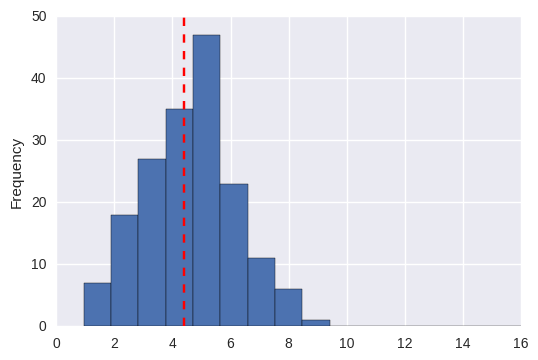

In [56]:
merge_data_fal_sum.plot(kind='hist',range=(0,16),bins=17)
plt.axvline(merge_data_fal_sum.mean(),linestyle='--',c='r')

In [57]:
fal_data = (merge_data_fal_sum>=7).astype(int)

In [58]:
merge_fal_data = pd.concat([fal_data,Q11_open],axis=1)

In [59]:
merge_fal_data.groupby(0).mean()

,Q11_目標_1.0,Q11_目標_2.0,Q11_目標_3.0,Q11_目標_4.0,Q11_目標_6.0
0,,,,,
0,0.471338,0.363057,0.101911,0.019108,0.031847
1,0.388889,0.388889,0.111111,0.111111,0.000000


In [60]:
merge_fal_data.head()

,0,Q11_目標_1.0,Q11_目標_2.0,Q11_目標_3.0,Q11_目標_4.0,Q11_目標_6.0
0,0,1.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0,0.0
2,0,0.0,1.0,0.0,0.0,0.0
3,0,0.0,1.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.0


In [67]:
#マネジメント評価は低くても目的達成度が高い
fal_data_q11 = pd.concat([fal_data,Q11_open],axis=1)

In [74]:
fal_data_q11[(fal_data_q11[0]==1) & (fal_data_q11[u"Q11_目標_1.0"]==1)]

,0,Q11_目標_1.0,Q11_目標_2.0,Q11_目標_3.0,Q11_目標_4.0,Q11_目標_6.0
34,1,1.0,0.0,0.0,0.0,0.0
38,1,1.0,0.0,0.0,0.0,0.0
95,1,1.0,0.0,0.0,0.0,0.0
136,1,1.0,0.0,0.0,0.0,0.0
143,1,1.0,0.0,0.0,0.0,0.0
154,1,1.0,0.0,0.0,0.0,0.0
161,1,1.0,0.0,0.0,0.0,0.0
